## Gaussian-Process manually!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Plotting sample function and sample data
def sample_function(x):
    '''
    x : -3 ~ 3
    '''
    assert type(x) == np.ndarray, print('Type of x should be numpy')
    return np.sin(x)

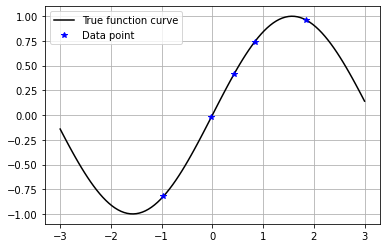

In [118]:
x = np.linspace(-3,3,101)
y = sample_function(x)
x_data = np.array([-0.9632,-0.02,0.43287,0.839,1.8389])
y_data = sample_function(x_data)
plt.plot(x,y,'k-',label='True function curve')
plt.plot(x_data,y_data,'b*',label='Data point')
plt.grid()
plt.legend()

In [124]:
# define RBF kernel
def rbf(x1,x2,sig=1,length=2):
    '''
    input 
    x1, x2 : two input data
    sig: sigma value
    length: RBF value
    
    output
    return sig**2*exp(-(x1-x2)**2/2/length**2)
    '''
    return sig**2*np.exp(-0.5*((x1-x2)/length)**2)

In [125]:
# making mean function and covariance matrix for gaussian matrix
def making_covariance(x_data):
    '''
    input
    x_data: len(data) array, np.ndarray
    
    output
    covariance_matrix: len(data)*len(data) matrix, np.ndarray
    '''
    covariance_matrix = np.zeros((len(x_data), len(x_data)))
    # Think covariance_matrix is positive symmetric
    for i,x_i in enumerate(x_data):
        for j,x_j in enumerate(x_data):
            if i > j:
                pass
            covariance_matrix[i,j] = rbf(x_i,x_j)
    covariance_matrix = (covariance_matrix + covariance_matrix.T)/2
    return covariance_matrix

def making_new_kernel(x0,x_data):
    '''
    input
    x0: input point that user wants guess
    x_data: given data
    
    output
    new_k: new kernel vector len(x_data)
    '''
    new_k = np.zeros(len(x_data))
    for i in range(len(new_k)):
         new_k[i] = rbf(x0,x_data[i])
    return new_k

def making_new_covariance(x0,x_data):
    '''
    input
    x0 : input point that user wants guess
    x_data : given data
    
    output: 
    new_covariance_matrix: (len(x_data)+1) x (len(x_data)+1) size covariance matrix
    '''
    new_covariance_matrix = np.zeros((len(x_data)+1,len(x_data)+1))
    new_covariance_matrix[1:,1:] = making_covariance(x_data)
    new_covariance_matrix[1:,0] = new_kernel(x0,x_data)
    new_covariance_matrix[0,1:] = new_covariance_matrix[1:,0]
    new_covariance_matrix[0,0] = rbf(x0,x0)
    return new_covariance_matrix

def calculate_mu(kernel,covariance_matrix,y_data):
    '''
    input
    kernel: kerenel vector from given data
    covariance_matrix: covariance matrix from given data   
    y_data: given data
    
    output
    kernel.T @ inv(covariance_matrix) @ y_data
    '''
    return kernel.reshape(1,-1) @ np.linalg.inv(covariance_matrix) @ y_data

def calculate_sigma(k0, kernel,covariance_matrix):
    '''
    input
    k0: rbf kernel from input inference point
    kernel: kernel vector from given data
    covariance_matrix: covariance matrix from given data
    
    output
    simga: k0-kernel.T @ inv(covariance_matrix) @ kernel
    '''
    kernel = kernel.reshape(-1,1)
    return k0 - kernel.T @ np.linalg.inv(covariance_matrix) @ kernel

def gaussian_process(x0, x_data, y_data):
    '''
    input
    x0: infernece point data
    x_data: given data
    y_data: given label data
    
    output
    mu: inference output
    sigma: inference uncertainty
    '''    
    k0 = rbf(x0,x0)
    new_kernel = making_new_kernel(x0,x_data)
    covariance_matrix = making_covariance(x_data)
    
    mu = calculate_mu(new_kernel,covariance_matrix,y_data)
    sigma = calculate_sigma(k0,new_kernel,covariance_matrix)
    return mu, np.sqrt(sigma)

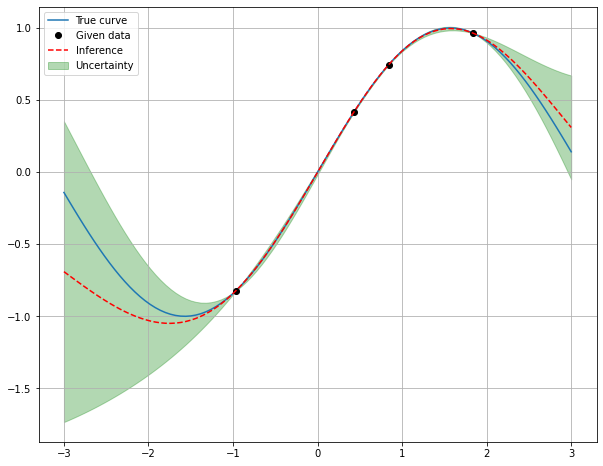

In [126]:
# Gaussian process sweep
x = np.linspace(-3,3,101)
y = sample_function(x)
x_data = np.array([-0.9632,0.43287,0.839,1.8389])
y_data = sample_function(x_data)

y_infer, y_std = [],[]
for x0 in x:
    mu,sigma = gaussian_process(x0,x_data,y_data)
    y_infer.append(mu)
    y_std.append(sigma)
    
y_infer = np.asarray(y_infer).ravel()
y_std = np.asarray(y_std).ravel()

plt.figure(figsize=(10,8))
plt.plot(x,y,label='True curve')
plt.plot(x_data,y_data,'ko',label='Given data')
plt.plot(x,y_infer,'r--',label='Inference')
plt.fill_between(x, y_infer-1.96*y_std, y_infer+1.96*y_std, alpha=0.3, color='green',label='Uncertainty')
plt.grid()
plt.legend()